In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [14]:
input_file = "hotel_booking.csv"
data = pd.read_csv(input_file)

relevant_columns = ['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'previous_cancellations']
df = data[relevant_columns]

In [29]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')


### Which market segment has the most cancellations

In [23]:
relevant_columns = ['is_canceled', 'previous_cancellations', 'market_segment', 'distribution_channel']
df = data[relevant_columns]

In [24]:
# Group by market segment and distribution channel, calculating average cancellation rate and previous cancellations
grouped_data = df.groupby(['market_segment', 'distribution_channel']).agg({'is_canceled': 'mean', 'previous_cancellations': 'mean'}).reset_index()

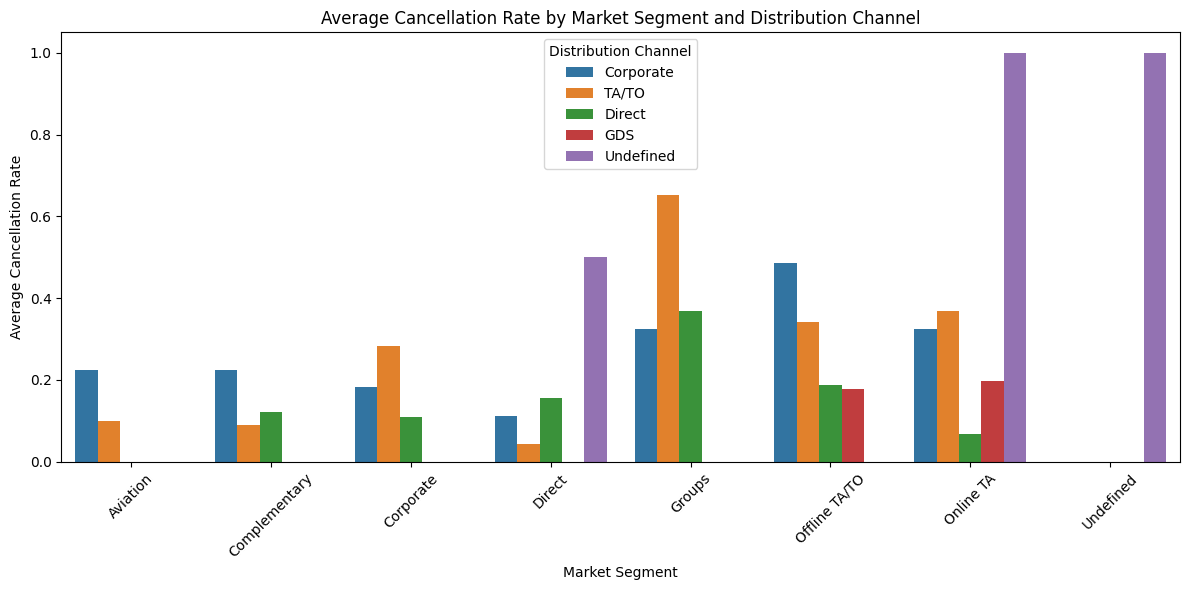

In [27]:
# Visualize average cancellation rate for each market segment and distribution channel
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='market_segment', y='is_canceled', hue='distribution_channel')
plt.xlabel('Market Segment')
plt.ylabel('Average Cancellation Rate')
plt.title('Average Cancellation Rate by Market Segment and Distribution Channel')
plt.xticks(rotation=45)
plt.legend(title='Distribution Channel')
plt.tight_layout()
plt.show()

### What is the most frequent lead time?

In [45]:
# Filter the data for relevant columns
lead_time_data = ['lead_time', 'is_canceled', 'arrival_date_month']
lead_time = data[lead_time_data]

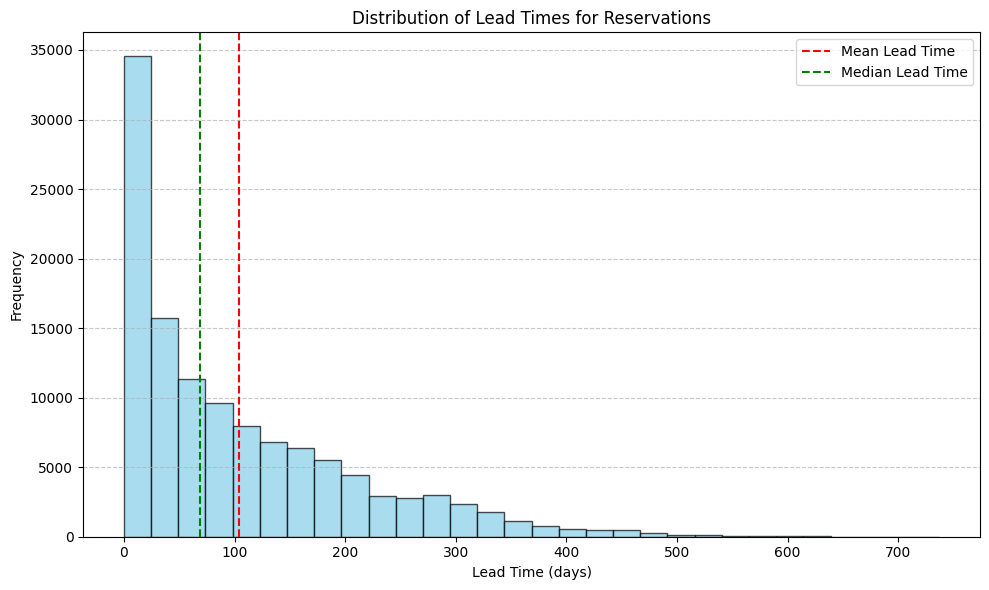

In [53]:
# Plot a histogram of lead times with improved visualization
plt.figure(figsize=(10, 6))
plt.hist(df['lead_time'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Times for Reservations')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add mean and median lines
mean_lead_time = df['lead_time'].mean()
median_lead_time = df['lead_time'].median()
plt.axvline(x=mean_lead_time, color='red', linestyle='--', label='Mean Lead Time')
plt.axvline(x=median_lead_time, color='green', linestyle='--', label='Median Lead Time')
plt.legend()

plt.show()

#### Esta análise fornecerá informações sobre a antecedência com que os hóspedes estão fazendo suas reservas. O histograma mostrará a distribuição dos prazos de entrega e os valores médios dos prazos de entrega lhe darão uma ideia do comportamento típico da reserva.

#### Você pode interpretar o histograma para compreender a distribuição dos prazos de entrega e usar os valores médios do prazo de entrega para adaptar as estratégias de marketing e promocionais de acordo. Além disso, a análise dos prazos médios de entrega para diferentes meses pode ajudá-lo a identificar padrões sazonais no comportamento de reserva.

In [52]:
# Calculate the average lead time
average_lead_time = df['lead_time'].mean()
print("Average Lead Time:", average_lead_time)

Average Lead Time: 104.01141636652986


In [48]:
# Calculate the average lead time for each month
average_lead_time_per_month = df.groupby('arrival_date_month')['lead_time'].mean().reset_index()
print("Average Lead Time per Month:")
print(average_lead_time_per_month)

Average Lead Time per Month:
   arrival_date_month   lead_time
0               April   94.822888
1              August  121.137710
2            December   73.561357
3            February   47.859569
4             January   45.310002
5                July  136.322565
6                June  128.247280
7               March   70.119257
8                 May  117.646171
9            November   76.580807
10            October  122.994624
11          September  136.675200


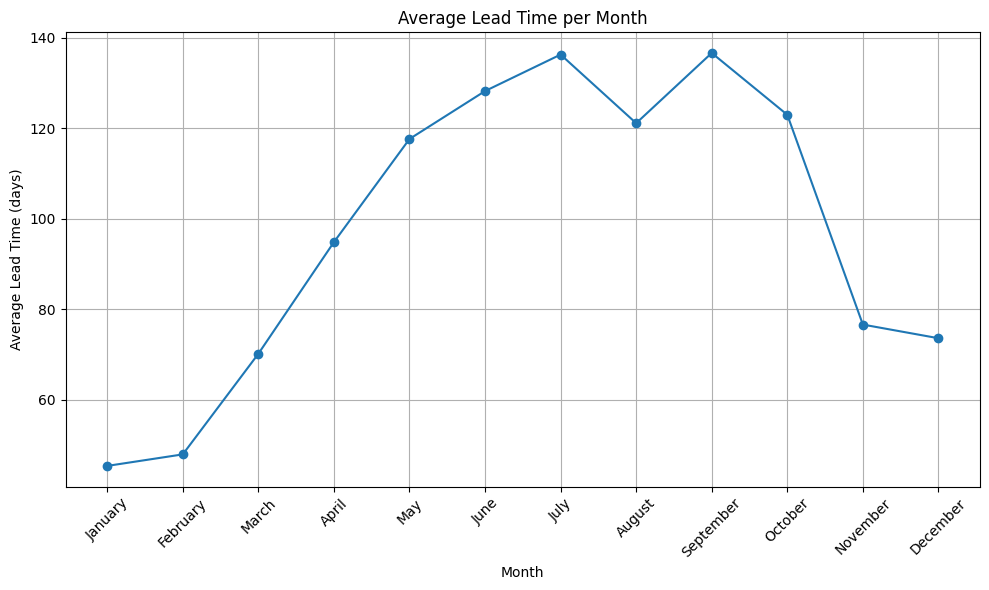

In [50]:
# Define the order of months for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_lead_time_per_month['arrival_date_month'] = pd.Categorical(average_lead_time_per_month['arrival_date_month'], categories=month_order, ordered=True)
average_lead_time_per_month = average_lead_time_per_month.sort_values('arrival_date_month')

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_lead_time_per_month['arrival_date_month'], average_lead_time_per_month['lead_time'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (days)')
plt.title('Average Lead Time per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Este gráfico de linhas mostra quantos dias antes da chegada eles fazem as reservas.